In [1]:
import cv2
%matplotlib inline
from scipy import ndimage, signal
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.morphology import dilation, disk, erosion, opening, closing, square, rectangle
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import watershed, expand_labels
from skimage.color import label2rgb
import tifffile
import numpy as np
from numpy.fft import fft, fftfreq, ifft, fft2, fftn
import matplotlib.pyplot as plt

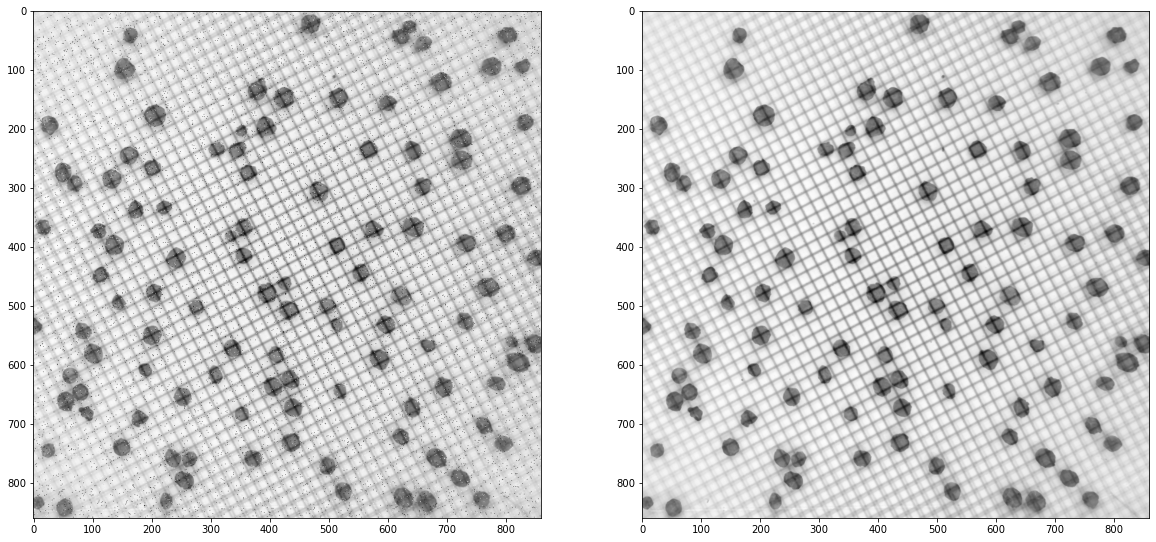

In [2]:
input = tifffile.imread('input.tif')
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

#Remove salt and petter noise
denoised_image = ndimage.median_filter(input, 3)


ax[0].imshow(input, cmap="gray")
ax[1].imshow(denoised_image, cmap="gray")

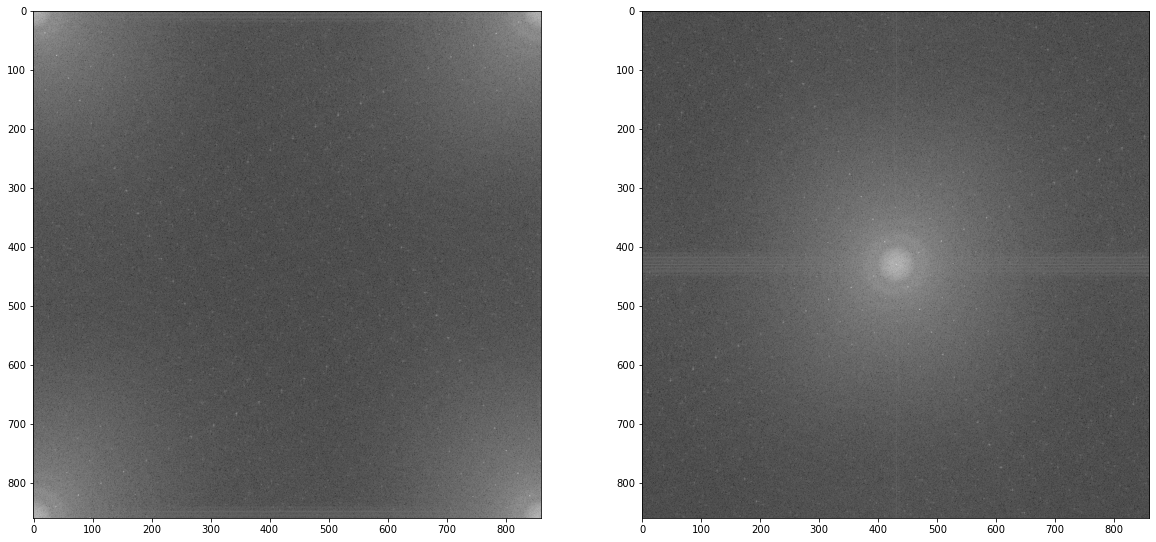

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

img_c2 = np.fft.fft2(denoised_image)

img_c3 = np.fft.fftshift(img_c2)

ax[0].imshow(np.log(1+np.abs(img_c2)), "gray")
ax[1].imshow(np.log(1+np.abs(img_c3)), "gray")

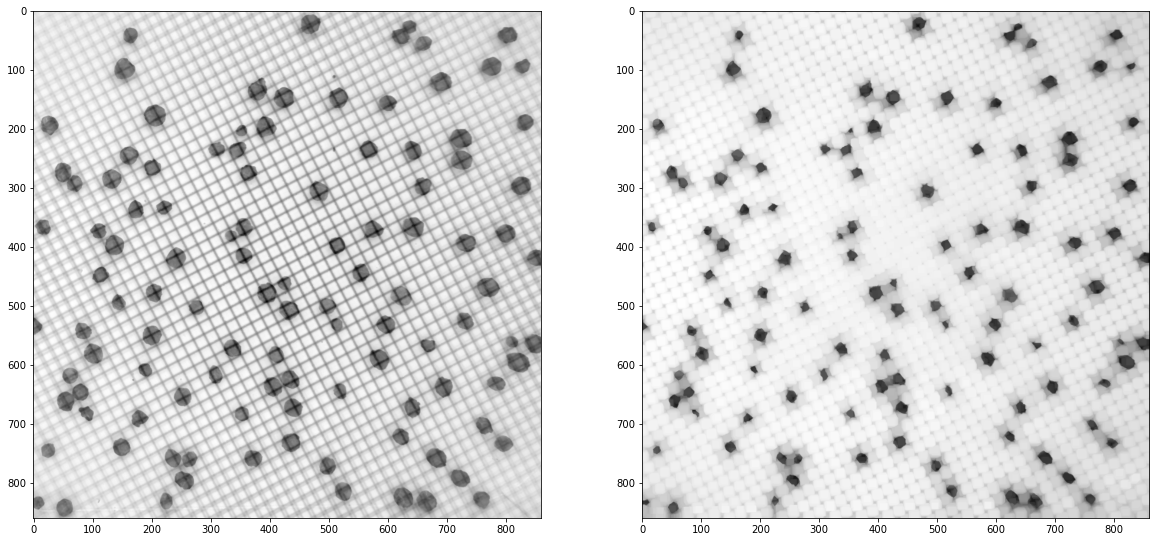

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
footprint = square(10)
test = dilation(denoised_image, footprint)

ax[0].imshow(denoised_image, "gray")
ax[1].imshow(test, "gray")

Text(0.5, 1.0, 'Detected Peppercorns')

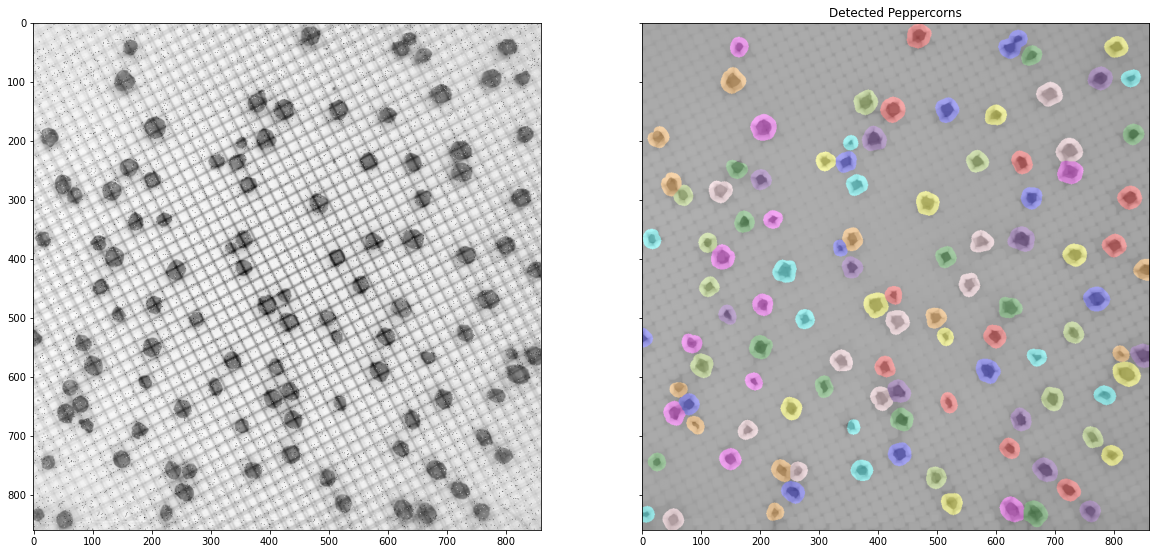

In [6]:
# edge detection
edges = sobel(test)
markers = np.zeros_like(test)
# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
foreground, background = 1, 2
markers[test > 148.0] = background
markers[test < 145.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

expanded = expand_labels(seg1, distance=10)

# Show the segmentations.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10),
                         sharex=True, sharey=True)

color1 = label2rgb(seg1, image=test, bg_label=0)
#axes[0].imshow(color1)
#axes[0].set_title('Sobel+Watershed')
axes[0].imshow(input, "gray")

color2 = label2rgb(expanded, image=test, bg_label=0)
axes[1].imshow(color2)
axes[1].set_title('Detected Peppercorns')

In [7]:
print("Count of peppercorns: " + str(seg1.max()))

Count of peppercorns: 109
